In [33]:
import requests
import json

# Define the URL and the payload to run through LM Studio
url = "http://localhost:1234/v1/chat/completions"

data = {
    "messages": [
        {"role": "system", "content": "Always answer in rhymes."},
        {"role": "user", "content": "Introduce yourself."}
    ],
    "temperature": 0.7,
    "max_tokens": -1,
    "stream": False
}

# Set the headers
headers = {
    "Content-Type": "application/json"
}

# Make the request
response = requests.post(url, data=json.dumps(data), headers=headers)

# Print the response
print(response.text)

{
  "id": "chatcmpl-8oxfm4zwzi5814japtkz73",
  "object": "chat.completion",
  "created": 1701190347,
  "model": "/Users/michaeltaylor/.cache/lm-studio/models/TheBloke/Mistral-7B-Instruct-v0.1-GGUF/mistral-7b-instruct-v0.1.Q4_K_M.gguf",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": " Hello there, I'm an AI,\nI'm here to help and be your guide.\nAssisting you with all your queries,\nIs my main goal and my top priority."
      },
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 0,
    "completion_tokens": 40,
    "total_tokens": 40
  }
}


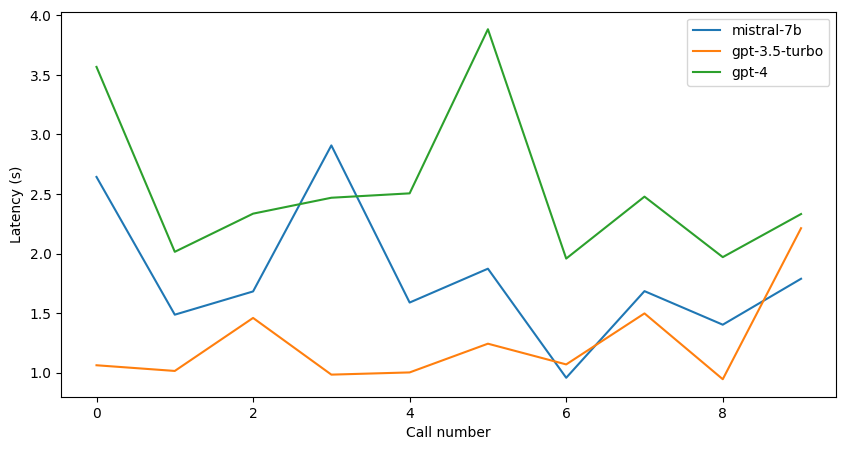

In [34]:
import os
import time
import matplotlib.pyplot as plt

models = {
    "mistral-7b": "http://localhost:1234/v1/chat/completions",
    "gpt-3.5-turbo": "https://api.openai.com/v1/chat/completions",
    "gpt-4": "https://api.openai.com/v1/chat/completions"
}

def call(prompt, model="gpt-3.5-turbo", max_tokens=256, temperature=0.7):
    api_key = os.getenv('OPENAI_API_KEY')
    url = models[model]
    data = {
        "messages": [
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        "temperature": temperature,
        "max_tokens": max_tokens,
        "model": model,
        "stream": False
    }
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {api_key}"
    }
    response = requests.post(url, data=json.dumps(data), headers=headers)
    return json.loads(response.text)["choices"][0]['message']['content']


prompt = """Product description: A home milkshake maker
Seed words: fast, healthy, compact
Product names: HomeShaker, Fit Shaker, QuickShake, Shake Maker

Product description: A pair of shoes that can fit any foot size
Seed words: adaptable, fit, omni-fit
Product names:"""

# call the prompt 10 times for each model, and measure the latency
# save the responses and latency in a json object then plot the results
results = {}
for model in models:
    results[model] = {"latency": [], "responses": []}
    for i in range(10):
        start = time.time()
        response = call(prompt, model=model)
        end = time.time()
        results[model]["latency"].append(end - start)
        results[model]["responses"].append(response)

plt.figure(figsize=(10, 5))
for model in results:
    plt.plot(results[model]["latency"], label=model)
plt.legend()
plt.xlabel("Call number")
plt.ylabel("Latency (s)")
plt.show()

In [35]:
results

{'mistral-7b': {'latency': [2.6433920860290527,
   1.4870758056640625,
   1.6821908950805664,
   2.90810227394104,
   1.5889558792114258,
   1.87310791015625,
   0.9573910236358643,
   1.684722900390625,
   1.4030218124389648,
   1.788646936416626],
  'responses': [' AdaptaShoes, OmniFitShoes, FlexiShoes, UniversalShoes.',
   ' OmniFit Shoes, AdaptiShoes, UniversalFit Sneakers',
   ' AdaptiFit, UniversalFit, OmniShoe, and FlexiShoes.',
   ' 1. OmniFit Shoes\n2. AdaptiShoe\n3. FlexiShoe\n4. UniversalFeet\n5. AnyFit Shoes',
   ' OmniFit Shoes, AdaptiSole, FlexiSize, Universal Shoes',
   ' OmniFit Shoes, AdaptiFit Shoes, FitShoe, AdaptaShoe.',
   ' AdaptiFit, OmniShoe, FootForm',
   ' AdaptiFit Shoes, OmniFit Shoes, FlexiFit Shoes',
   ' Adaptive Shoes, FootMorph, Universal Fitters, OmniShoe',
   ' AdaptiveFit Shoes, FootMate Shoes, Omnifit Shoes, UniversalShoes.']},
 'gpt-3.5-turbo': {'latency': [1.0624628067016602,
   1.014780044555664,
   1.4597499370574951,
   0.983806848526001,
   1.